# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

train_df = pd.read_csv("train.csv", encoding="utf-8")

In [2]:
test_df = pd.read_csv("test.csv", encoding="utf-8")

In [3]:
data = pd.concat([train_df, test_df], ignore_index=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f"{data.duplicated().sum()}")

0


In [5]:
def cabin_head(s):
    if not pd.isna(s):
        return s[0]
data["Cabin"] = data["Cabin"].apply(cabin_head)

In [6]:
dict = data["Ticket"].value_counts()
data["Ticket"] = data["Ticket"].apply(lambda x:dict[x])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,7.2500,None,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,71.2833,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,7.9250,None,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,53.1000,C,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,1,8.0500,None,S


In [7]:
na = data.isna().sum()
na[na!=0].sort_values(ascending=False)

Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
dtype: int64

In [8]:
most = data["Embarked"].value_counts().idxmax()
data["Embarked"] = data["Embarked"].fillna(most)
na = data.isna().sum()
na[na!=0].sort_values(ascending=False)

Cabin       1014
Survived     418
Age          263
Fare           1
dtype: int64

In [9]:
median = data.median().drop(["Pclass"])
data = data.fillna(median)
na = data.isna().sum()
na[na!=0].sort_values(ascending=False)

Cabin    1014
dtype: int64

In [10]:
def name_convert(s):
    s = s.split(",")[-1].split(".")[0]
    s = s.strip()
    return s
counts = data["Name"].apply(name_convert).value_counts()
whitelist = counts[counts > 50].index
def name_convert(s):
    s = s.split(",")[-1].split(".")[0]
    s = s.strip()
    if s in whitelist:
        return s
    else:
        None
data["Name"] = data["Name"].apply(name_convert)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,Mr,male,22.0,1,0,1,7.2500,None,S
1,2,1.0,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,1.0,3,Miss,female,26.0,0,0,1,7.9250,None,S
3,4,1.0,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,5,0.0,3,Mr,male,35.0,0,0,1,8.0500,None,S


In [11]:
# when preprocessing DataFrame use this to check columns
cat_cols, num_cols = list(), list()
for col in data.columns:
    print(f"{col:>11}:{data[col].nunique():>4}")
    if data[col].nunique() <= 5:
        cat_cols.append(col)
    else:
        num_cols.append(col)
print(f"Categorical:\n{cat_cols}\n"
      f"Numerical:\n{num_cols}")

PassengerId:1309
   Survived:   2
     Pclass:   3
       Name:   4
        Sex:   2
        Age:  98
      SibSp:   7
      Parch:   8
     Ticket:   9
       Fare: 281
      Cabin:   8
   Embarked:   3
Categorical:
['Survived', 'Pclass', 'Name', 'Sex', 'Embarked']
Numerical:
['PassengerId', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']


In [12]:
data = pd.get_dummies(data, columns=['Pclass', 'Name', 'Sex', 'Embarked', "Cabin"])
data.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0.0,22.0,1,0,1,7.2500,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2,1.0,38.0,1,0,2,71.2833,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1.0,26.0,0,0,1,7.9250,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,1.0,35.0,1,0,2,53.1000,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,0.0,35.0,0,0,1,8.0500,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [13]:
#模型建立後，後續嘗試的結果。
data["Family"] = data["SibSp"] + data["Parch"]
data.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Family
0,1,0.0,22.0,1,0,1,7.2500,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,2,1.0,38.0,1,0,2,71.2833,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3,1.0,26.0,0,0,1,7.9250,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,4,1.0,35.0,1,0,2,53.1000,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,5,0.0,35.0,0,0,1,8.0500,0,0,1,...,1,0,0,0,0,0,0,0,0,0


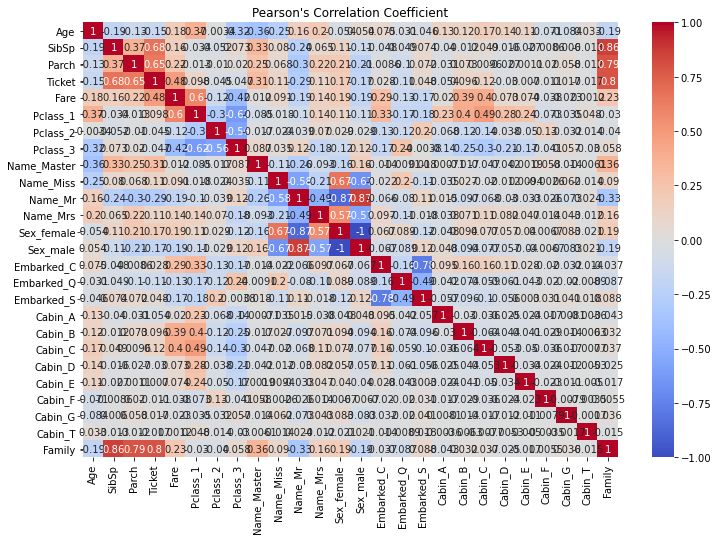

In [14]:
data_copy = data.drop(["PassengerId", "Survived"], axis=1)
plt.figure(figsize = (12, 8))
sns.heatmap(data_copy.corr(), annot=True ,cmap="coolwarm")
plt.title("Pearson's Correlation Coefficient")
plt.show()

# Machine Learning

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
X_train = data.iloc[:train_df.shape[0], :].drop(columns=["PassengerId", "Survived"])
y_train = train_df["Survived"]

model1 = MLPClassifier().fit(X_train, y_train)
model2 = RandomForestClassifier().fit(X_train, y_train)

name_list = ["DNN", "RF"]
model_list = [model1, model2]

for name, model in zip(name_list, model_list):
    cv_score = cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1)
    print(f"{name}:\n\tcv10_Accuracy:{cv_score.mean():5>.3f}")

DNN:
	cv10_Accuracy:0.798
RF:
	cv10_Accuracy:0.811


In [17]:
#Use all data to Turn model
dnn_param = {"solver":["sgd", "adam"], "learning_rate":["constant", "adaptive"], "warm_start":["True", "False"]}
rf_param = {"max_depth":range(3, 11), "n_estimators":range(20, 101, 2)}

name_list = ["DNN", "RF"]
model_list = [MLPClassifier(), RandomForestClassifier()]
param_list = [dnn_param, rf_param]

for name, model, param in zip(name_list, model_list, param_list):
    clf = GridSearchCV(model, param, cv=5, n_jobs=-1).fit(X_train, y_train)
    print(f"{name}:\n\t{clf.best_params_}\n\t{clf.best_score_:.3f}")

DNN:
	{'learning_rate': 'adaptive', 'solver': 'adam', 'warm_start': 'False'}
	0.820
RF:
	{'max_depth': 5, 'n_estimators': 40}
	0.835


In [ ]:
result = pd.DataFrame()
result["PassengerId"] = test_df["PassengerId"]
X_test = data.copy().iloc[train_df.shape[0]:, :].drop(columns=["PassengerId", "Survived"])

In [22]:
name_list = ["DNN", "RF"]
model_list = [MLPClassifier(learning_rate="adaptive", solver="adam", warm_start=True),
              RandomForestClassifier(max_depth=10, n_estimators=24)]

for name, model in zip(name_list, model_list):
    model.fit(X_train, y_train)
    result["Survived"] = model.predict(X_test).astype(int)
    result.to_csv(f"{name}.csv", encoding="utf-8", index=False)

from sklearn.metrics import confusion_matrix
truedf = pd.read_csv("gender_submission.csv")
for name in name_list:
    preddf = pd.read_csv(f"{name}.csv")
    y_true = truedf["Survived"]
    y_pred = preddf["Survived"]
    print(f"{name}: {accuracy_score(y_true, y_pred):.4f}")
    print(f"{confusion_matrix(y_true, y_pred)}\n")

DNN: 0.8565
[[231  35]
 [ 25 127]]

RF: 0.8756
[[245  21]
 [ 31 121]]



In [29]:
pd.DataFrame({
    "Name":data.columns,
    "Importance":model_list[1].feature_importances_
}).sort_values(by="Importance", ascending=False)[:5]
#sum(model_list[1].feature_importances_)

,Name,Importance
10,Name_Mr,0.148317
4,Fare,0.147516
0,Age,0.123238
13,Sex_male,0.117745
12,Sex_female,0.087254


In [19]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
data.drop(columns=["PassengerId", "Survived"], inplace=True)
data_scalar = scalar.fit_transform(data)

X_train_scalar = data_scalar[:train_df.shape[0]]
y_train = train_df["Survived"]

knn_param = {"n_neighbors":range(2,14)}

name_list2 = ["KNN"]
model_list2 = [KNeighborsClassifier()]
param_list2 = [knn_param]

for name, model, param in zip(name_list2, model_list2, param_list2):
    clf = GridSearchCV(model, param, cv=5, n_jobs=-1).fit(X_train_scalar, y_train)
    print(f"{name}:\n\t{clf.best_params_}\n\t{clf.best_score_:.3f}")

KNN:
	{'n_neighbors': 13}
	0.822


In [20]:
X_test_scalar = data_scalar[train_df.shape[0]:]

model_list2_modify = [KNeighborsClassifier(n_neighbors=11)]

for name, model in zip(name_list2, model_list2_modify):
    model.fit(X_train_scalar, y_train)
    result["Survived"] = model.predict(X_test_scalar).astype(int)
    result.to_csv(f"{name}.csv", encoding="utf-8", index=False)

from sklearn.metrics import confusion_matrix
truedf = pd.read_csv("gender_submission.csv")
for name in name_list2:
    preddf = pd.read_csv(f"{name}.csv")
    y_true = truedf["Survived"]
    y_pred = preddf["Survived"]
    print(f"{name}: {accuracy_score(y_true, y_pred):.4f}")
    print(f"{confusion_matrix(y_true, y_pred)}\n")

KNN: 0.9211
[[256  10]
 [ 23 129]]

